<a href="https://colab.research.google.com/github/soniyamishra/FDS/blob/main/Practical%2015/K_meansClusteringAlogirthm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://gist.github.com/summii/58f7b645bc6d1ac2f002e562264e47a4

Download bear.txt or copy paste in bear.txt


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving bear.csv to bear.csv


In [32]:
#K-means clustering
import numpy as np
red_point1 = np.array([1, 3])
red_point2 = np.array([2, 5])
red_point3 = np.array([3, 4])
red_center = (red_point1 + red_point2 + red_point3) / 3.
red_center

array([2., 4.])

In [39]:
import pandas as pd
beer = pd.read_csv('bear.csv',sep= ",")

X = beer.drop('name', axis=1)
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [40]:
beer['cluster'] = km.labels_
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,150.00,17.0,4.521429,0.520714
1,102.75,10.0,4.075000,0.440000
2,70.00,10.5,2.600000,0.420000


Text(0, 0.5, 'alcohol')

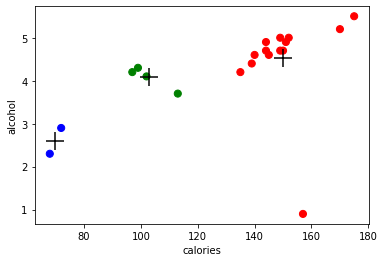

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

centers = beer.groupby('cluster').mean()
# create a "colors" array for plotting
colors = np.array(['red', 'green', 'blue', 'yellow'])
# scatter plot of calories versus alcohol, colored by cluster (0=red,1=green, 2=blue)
plt.scatter(beer.calories, beer.alcohol, c=colors[list(beer.cluster)],
s=50)
# cluster centers, marked by "+"
plt.scatter(centers.calories, centers.alcohol, linewidths=3,
marker='+', s=300, c='black')
# add labels
plt.xlabel('calories')
plt.ylabel('alcohol')